In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import TimeSeriesSplit, cross_val_score, KFold
from sklearn.utils import indexable
from sklearn.utils.validation import _num_samples
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
label_encoder=preprocessing.LabelEncoder()
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [2]:
income = pd.read_csv('adult.csv')
income

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
def column_summary(income):
    summary_data = []
    
    for col_name in income.columns:
        col_dtype = income[col_name].dtype
        num_of_nulls = income[col_name].isnull().sum()
        num_of_non_nulls = income[col_name].notnull().sum()
        num_of_distinct_values = income[col_name].nunique()
        
        if num_of_distinct_values <= 10:
            distinct_values_counts = income[col_name].value_counts().to_dict()
        else:
            top_10_values_counts = income[col_name].value_counts().head(10).to_dict()
            distinct_values_counts = {k: v for k, v in sorted(top_10_values_counts.items(), key=lambda item: item[1], reverse=True)}

        summary_data.append({
            'col_name': col_name,
            'col_dtype': col_dtype,
            'num_of_nulls': num_of_nulls,
            'num_of_non_nulls': num_of_non_nulls,
            'num_of_distinct_values': num_of_distinct_values,
            'distinct_values_counts': distinct_values_counts
        })
    
    summary_income = pd.DataFrame(summary_data)
    return summary_income
summary_income = column_summary(income)
display(summary_income)


,col_name,col_dtype,num_of_nulls,num_of_non_nulls,num_of_distinct_values,distinct_values_counts
0,age,int64,0,48842,74,"{36: 1348, 35: 1337, 33: 1335, 23: 1329, 31: 1..."
1,workclass,object,0,48842,9,"{'Private': 33906, 'Self-emp-not-inc': 3862, '..."
2,fnlwgt,int64,0,48842,28523,"{203488: 21, 190290: 19, 120277: 19, 125892: 1..."
3,education,object,0,48842,16,"{'HS-grad': 15784, 'Some-college': 10878, 'Bac..."
4,educational-num,int64,0,48842,16,"{9: 15784, 10: 10878, 13: 8025, 14: 2657, 11: ..."
5,marital-status,object,0,48842,7,"{'Married-civ-spouse': 22379, 'Never-married':..."
6,occupation,object,0,48842,15,"{'Prof-specialty': 6172, 'Craft-repair': 6112,..."
7,relationship,object,0,48842,6,"{'Husband': 19716, 'Not-in-family': 12583, 'Ow..."
8,race,object,0,48842,5,"{'White': 41762, 'Black': 4685, 'Asian-Pac-Isl..."
9,gender,object,0,48842,2,"{'Male': 32650, 'Female': 16192}"


In [4]:
income.duplicated().sum()

52

In [5]:
income.drop_duplicates()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>],
       [<Axes: title={'center': 'educational-num'}>,
        <Axes: title={'center': 'capital-gain'}>],
       [<Axes: title={'center': 'capital-loss'}>,
        <Axes: title={'center': 'hours-per-week'}>]], dtype=object)

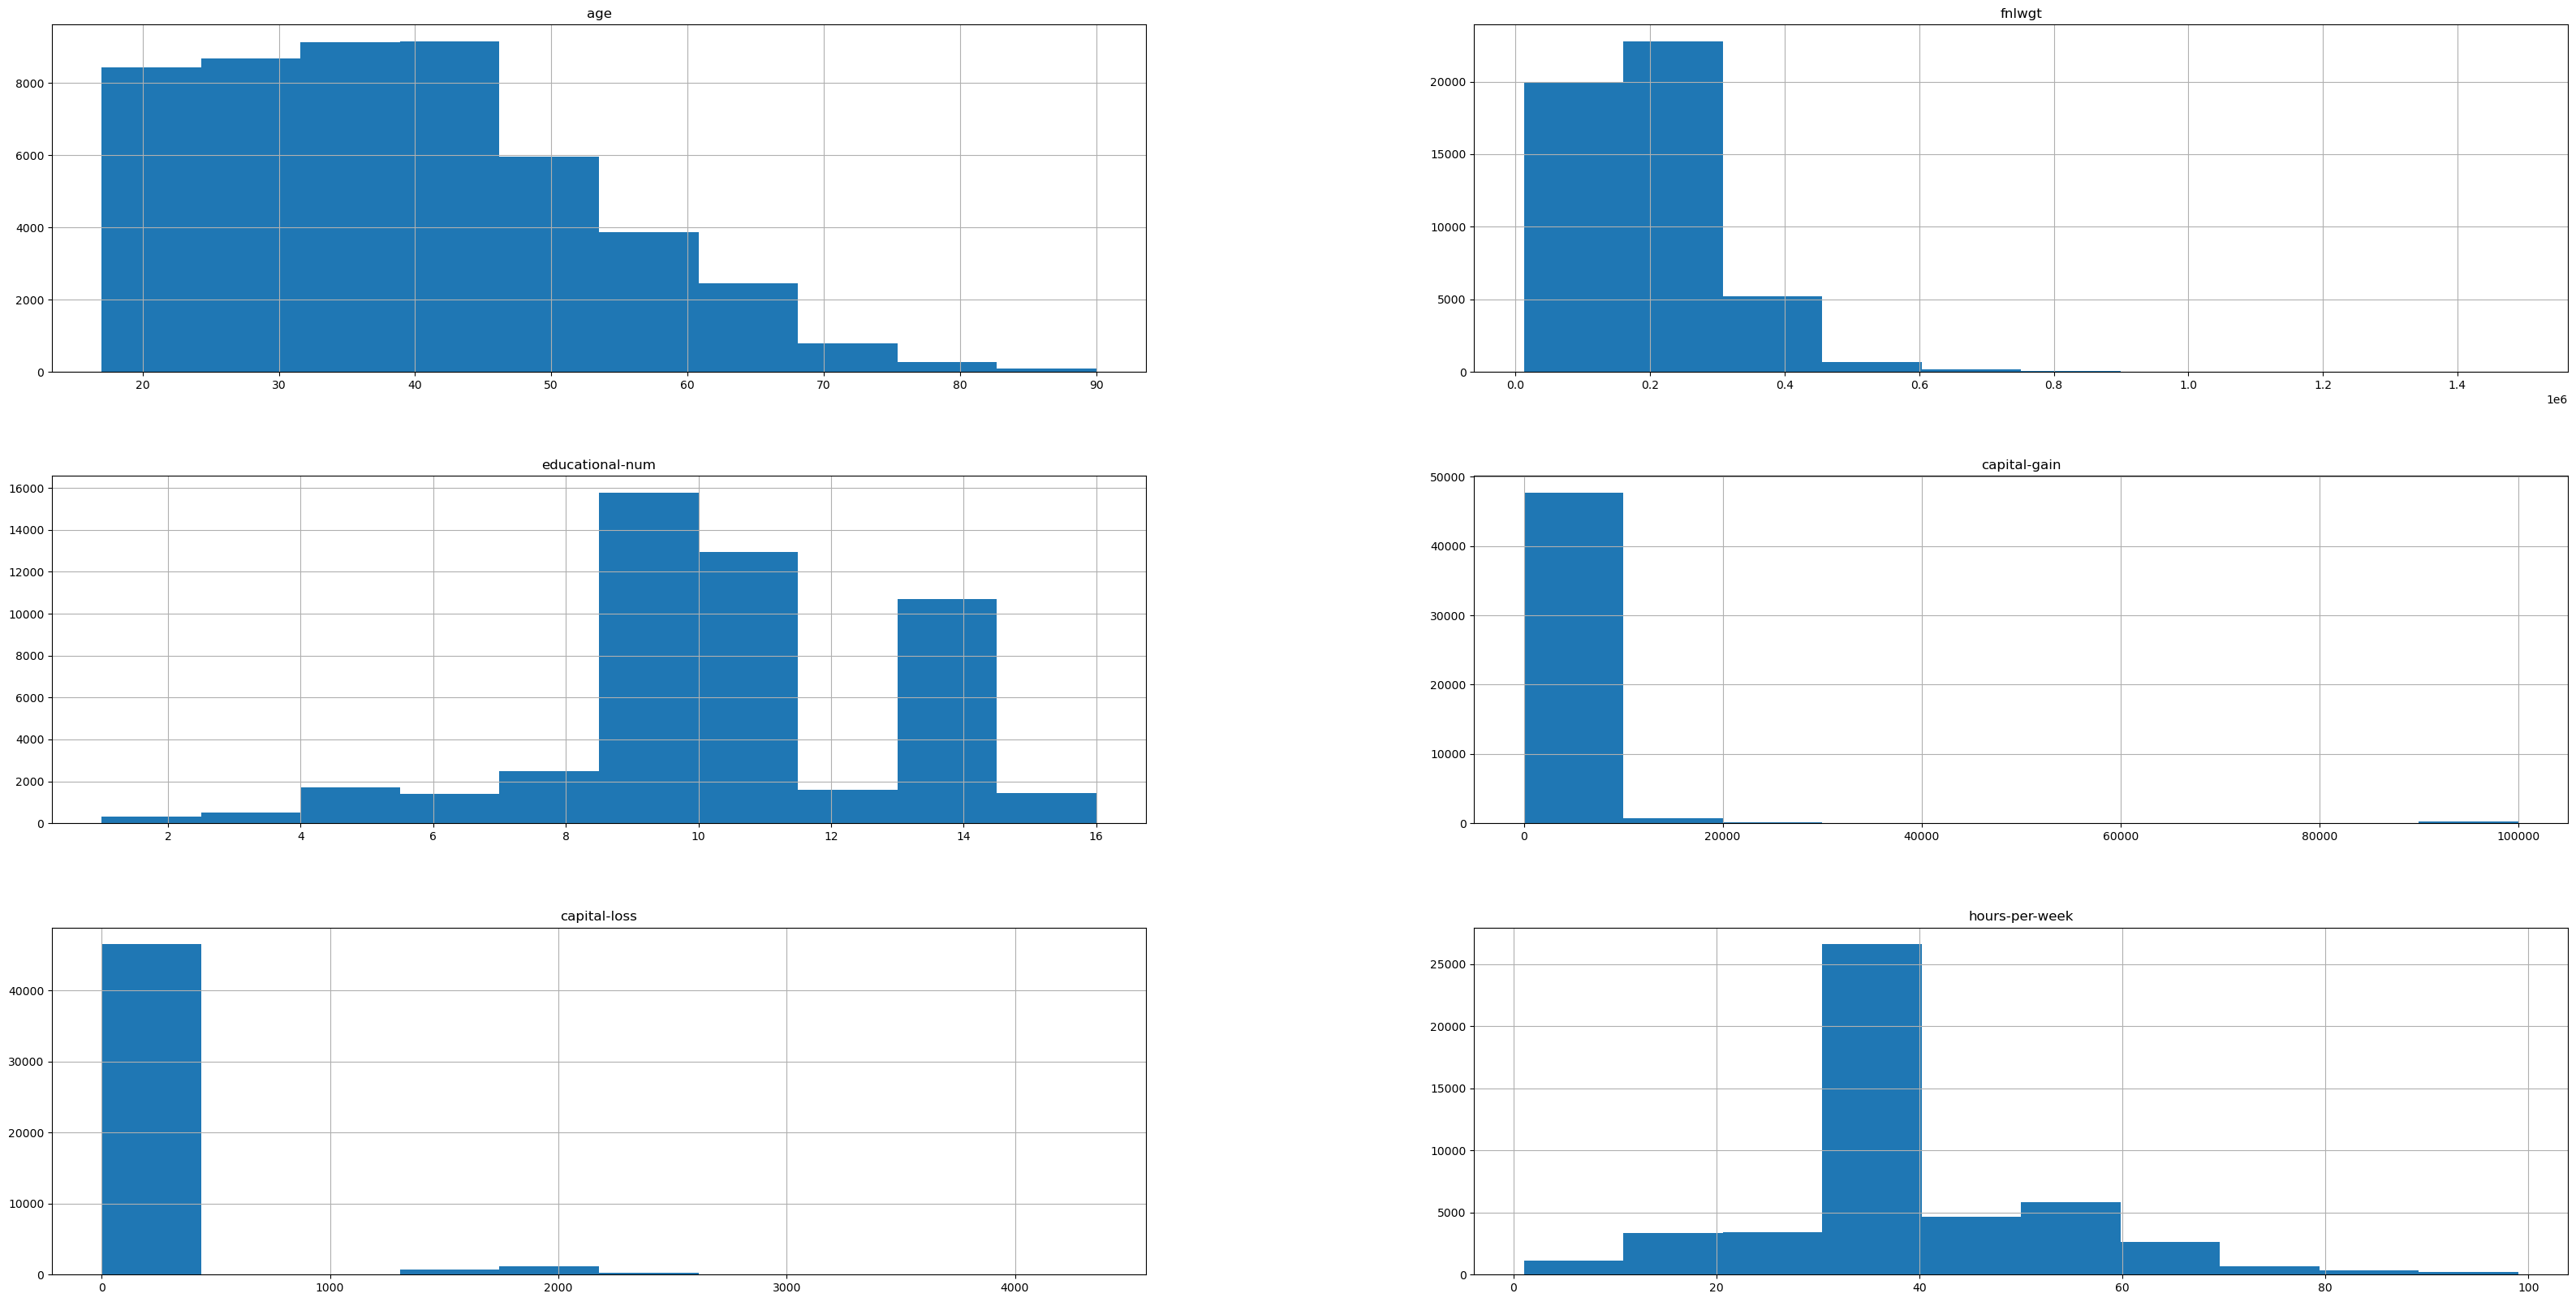

In [6]:
income.hist(figsize= (40,20))

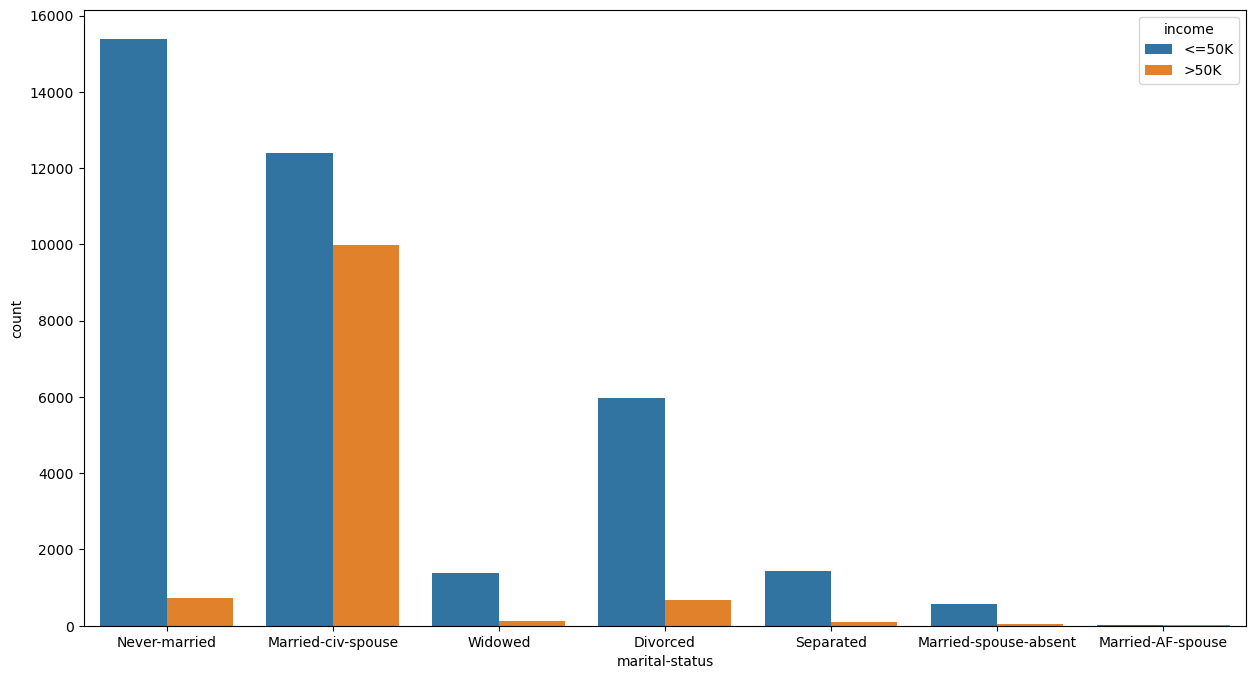

In [7]:
plt.figure(figsize=(15, 8))
sns.countplot(data=income, x='marital-status', hue='income')
plt.show()

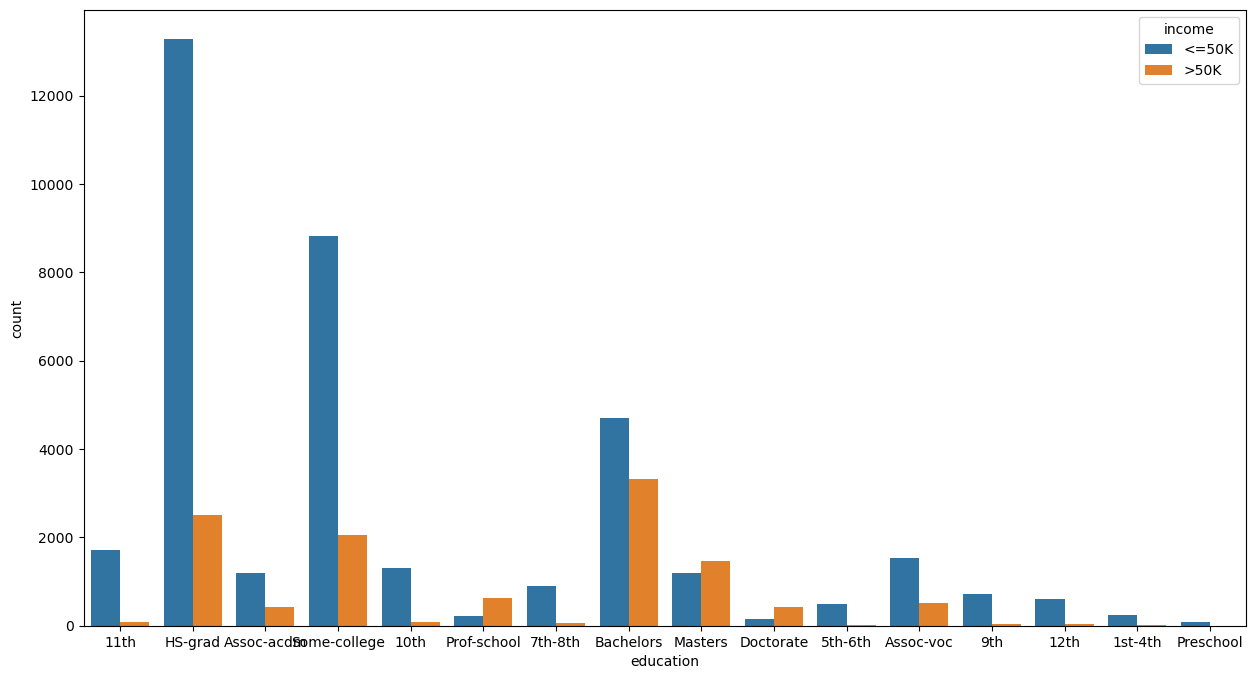

In [8]:
plt.figure(figsize=(15, 8))
sns.countplot(data=income, x='education', hue='income')
plt.show()

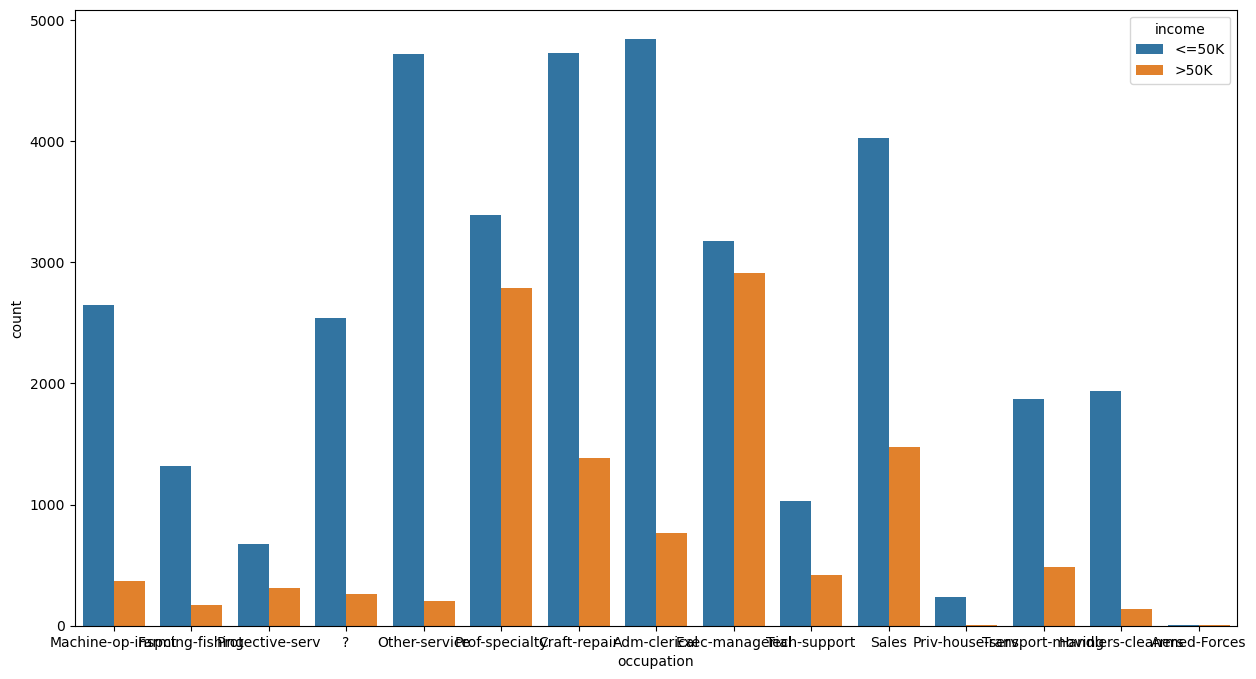

In [9]:
plt.figure(figsize=(15, 8))
sns.countplot(data=income, x='occupation', hue='income')
plt.show()

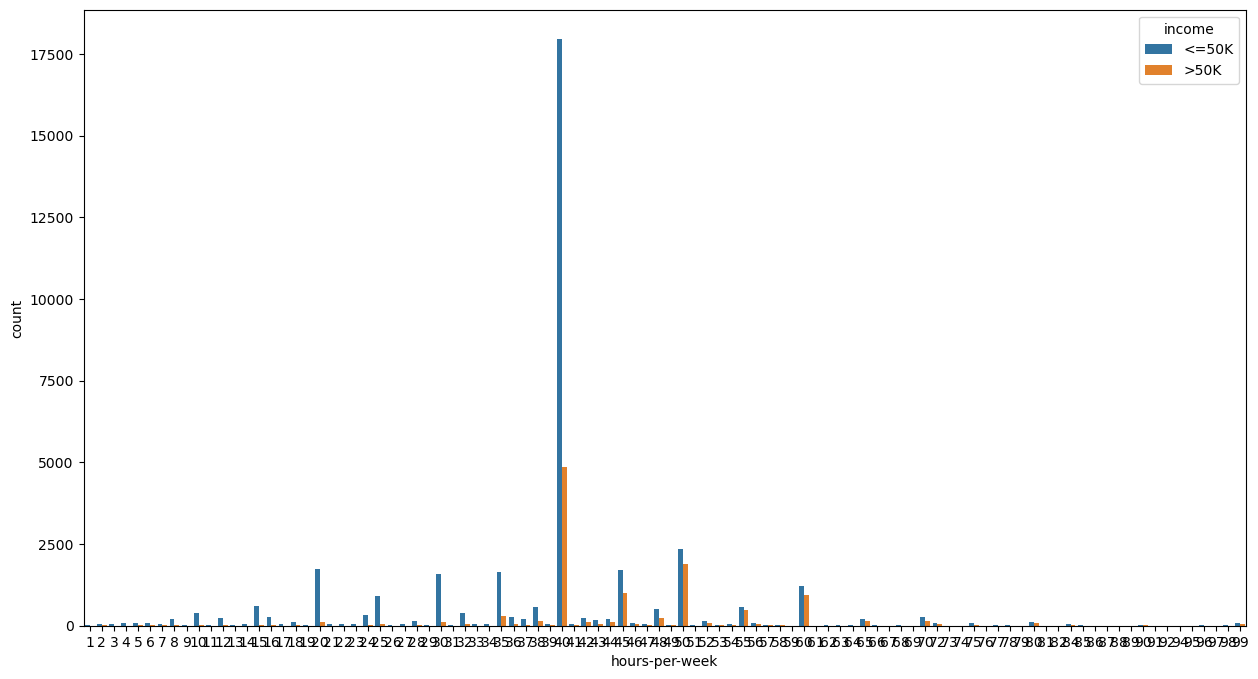

In [10]:

plt.figure(figsize=(15, 8))
sns.countplot(data=income, x='hours-per-week', hue='income')
plt.show()

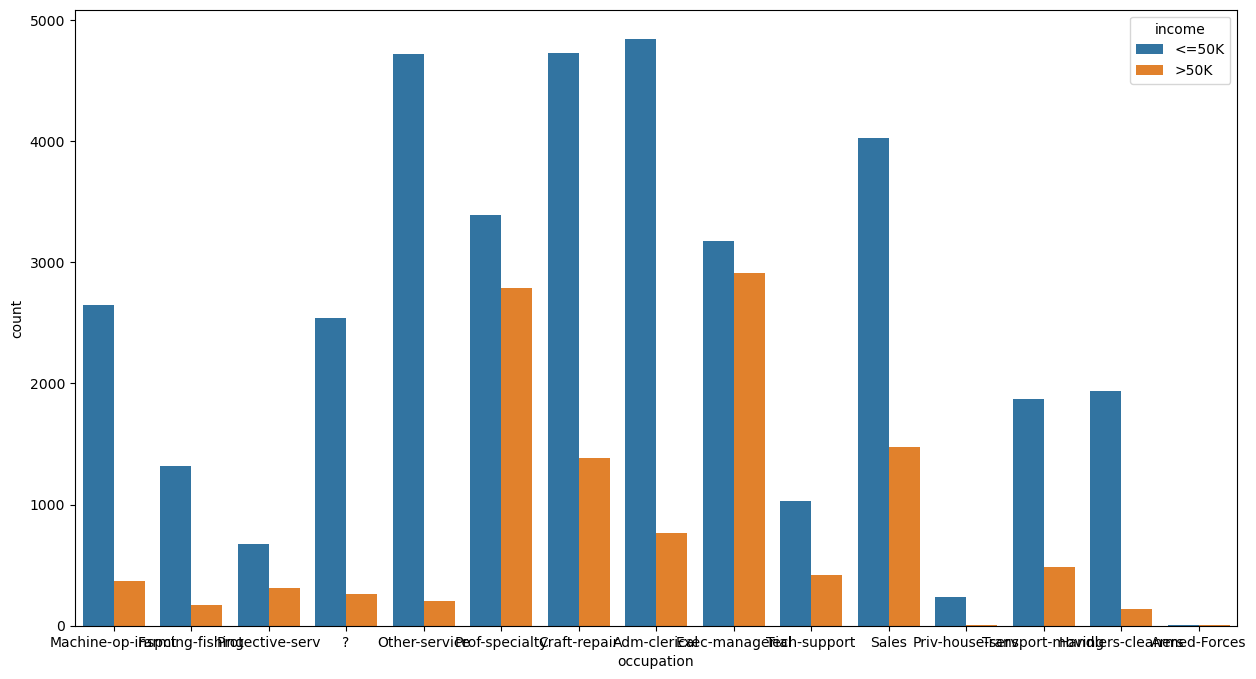

In [11]:
plt.figure(figsize=(15, 8))
sns.countplot(data=income, x='occupation', hue='income')
plt.show()

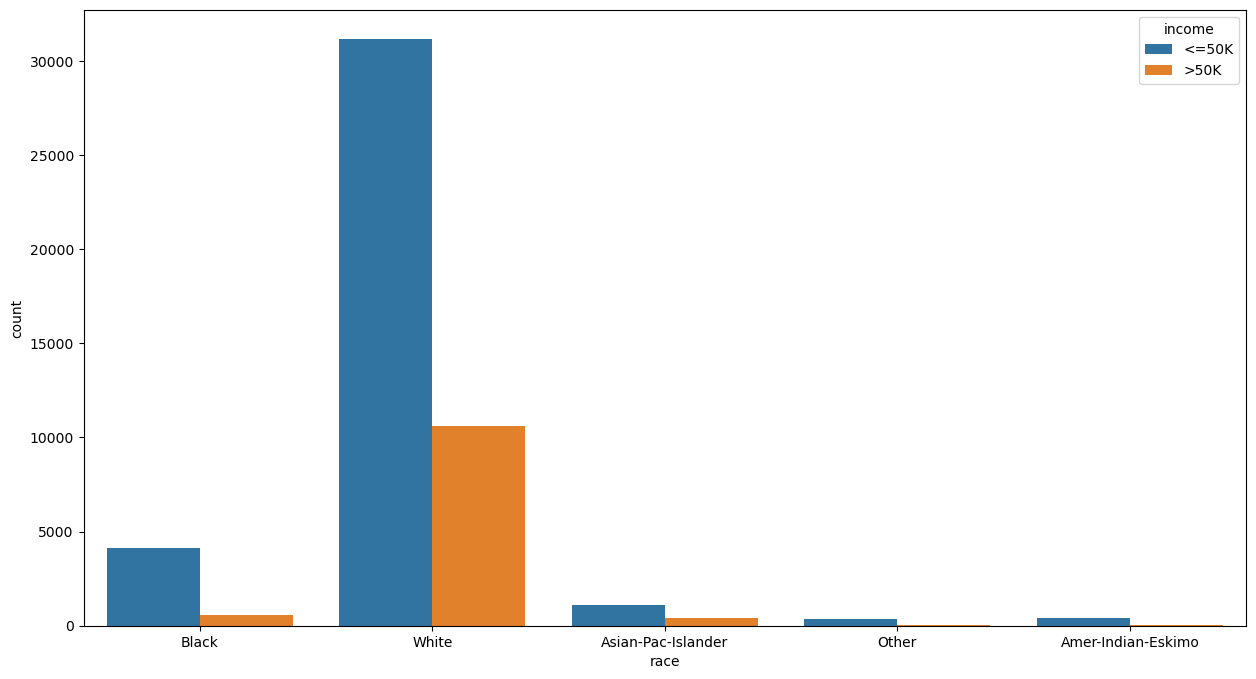

In [12]:
plt.figure(figsize=(15, 8))
sns.countplot(data=income, x='race', hue='income')
plt.show()

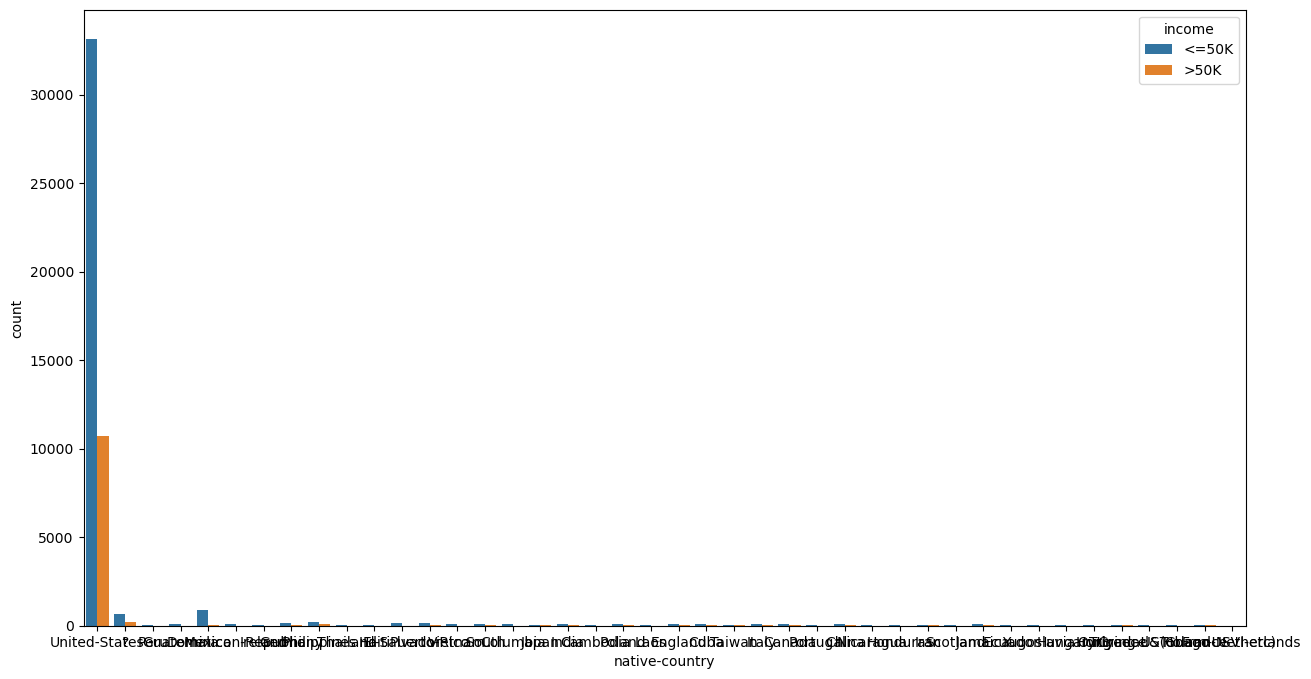

In [13]:
plt.figure(figsize=(15, 8))
sns.countplot(data=income, x='native-country', hue='income')
plt.show()

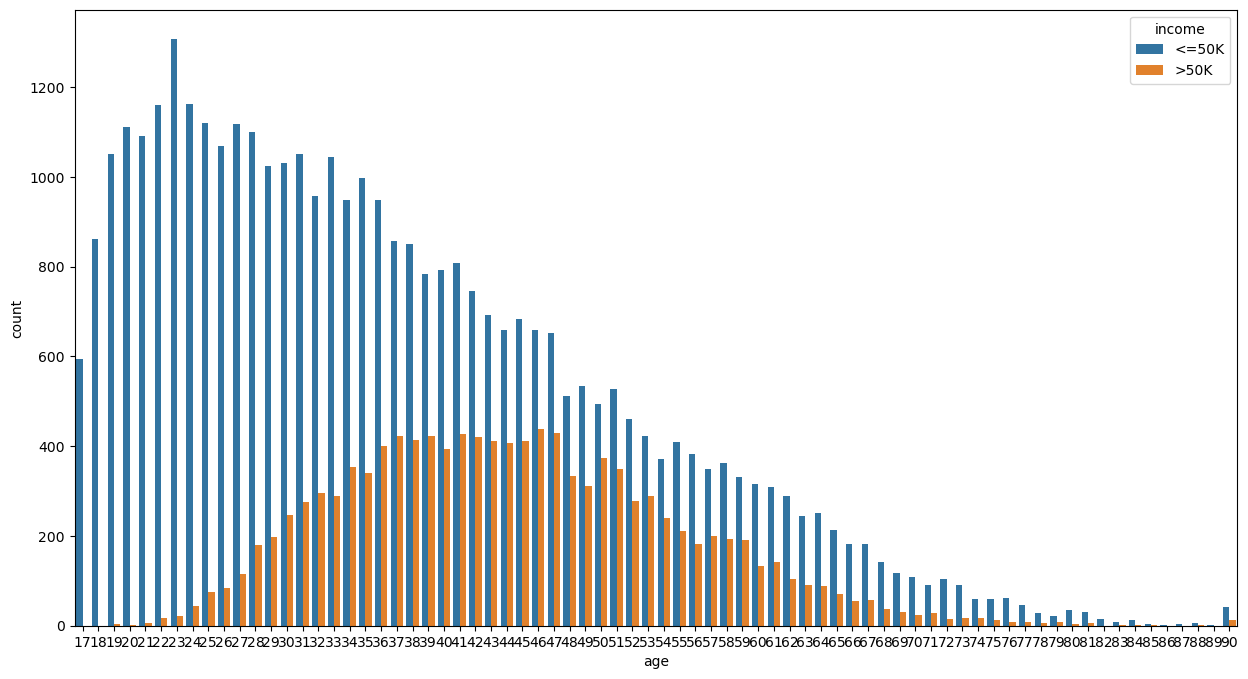

In [14]:
plt.figure(figsize=(15, 8))
sns.countplot(data=income, x='age', hue='income')
plt.show()

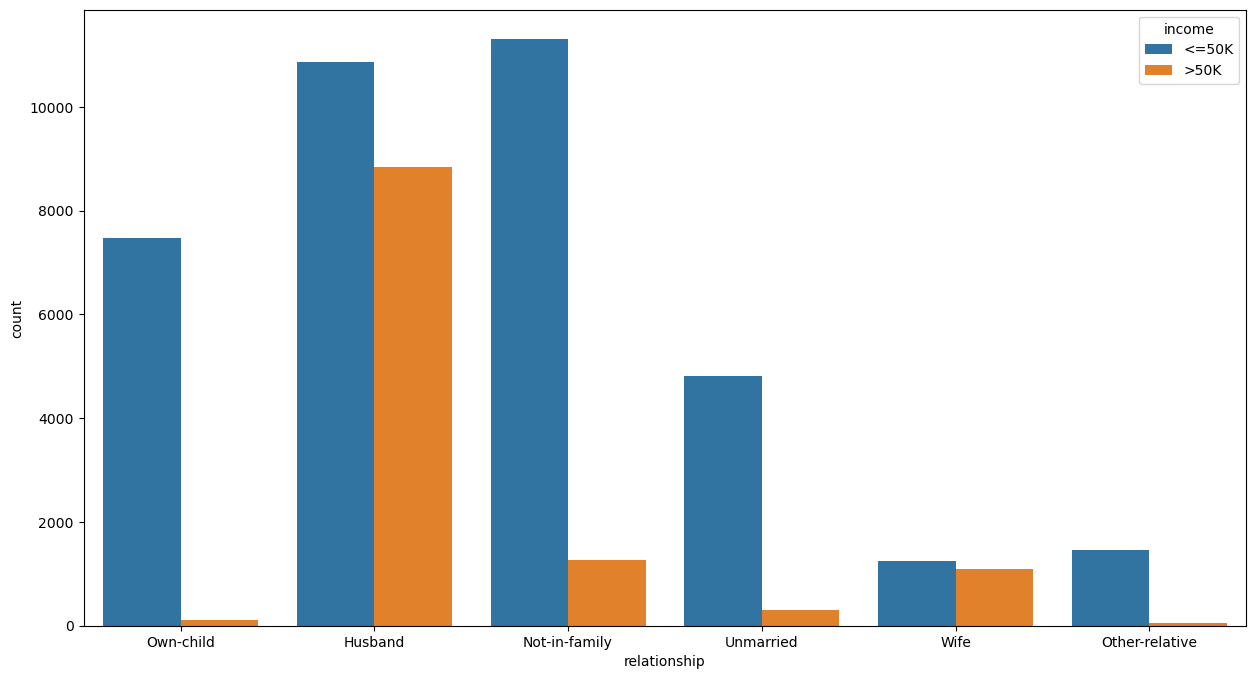

In [15]:
plt.figure(figsize=(15, 8))
sns.countplot(data=income, x='relationship', hue='income')
plt.show()

<Axes: >

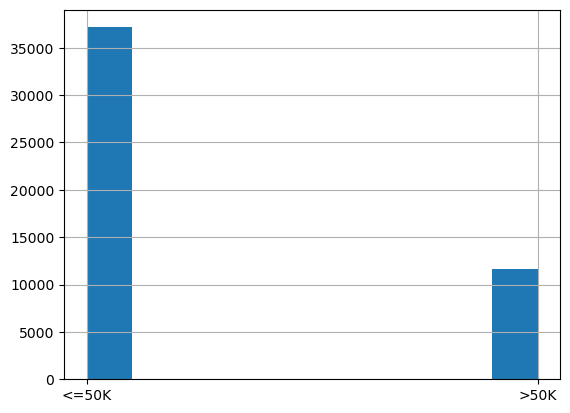

In [16]:
income['income'].hist()

In [17]:
#no nulls but many unique values
#lots of categorical data
#some discrete data
# may have more 

In [18]:
income.nunique()

age                   74
workclass              9
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64

In [19]:
income.isin(['?']).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [20]:
income['workclass'] = income['workclass'].replace('?','Private')
income['occupation'] = income['occupation'].replace('?','specialist')
income['native-country'] = income['native-country'].replace('?','not_given')

In [21]:
income.isin(['?']).sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [22]:
income.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [23]:
cat_col= income.select_dtypes(include=['object']).columns

le = LabelEncoder()

for col in cat_col:
    income[col] = le.fit_transform(income[col])

In [24]:
income.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,226802,1,7,4,6,3,2,1,0,0,40,38,0
1,38,3,89814,11,9,2,4,0,4,1,0,0,50,38,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,38,1
3,44,3,160323,15,10,2,6,0,2,1,7688,0,40,38,1
4,18,3,103497,15,10,4,14,3,4,0,0,0,30,38,0


In [25]:
income.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,3,257302,7,12,2,12,5,4,0,0,0,38,38,0
48838,40,3,154374,11,9,2,6,0,4,1,0,0,40,38,1
48839,58,3,151910,11,9,6,0,4,4,0,0,0,40,38,0
48840,22,3,201490,11,9,4,0,3,4,1,0,0,20,38,0
48841,52,4,287927,11,9,2,3,5,4,0,15024,0,40,38,1


<Axes: >

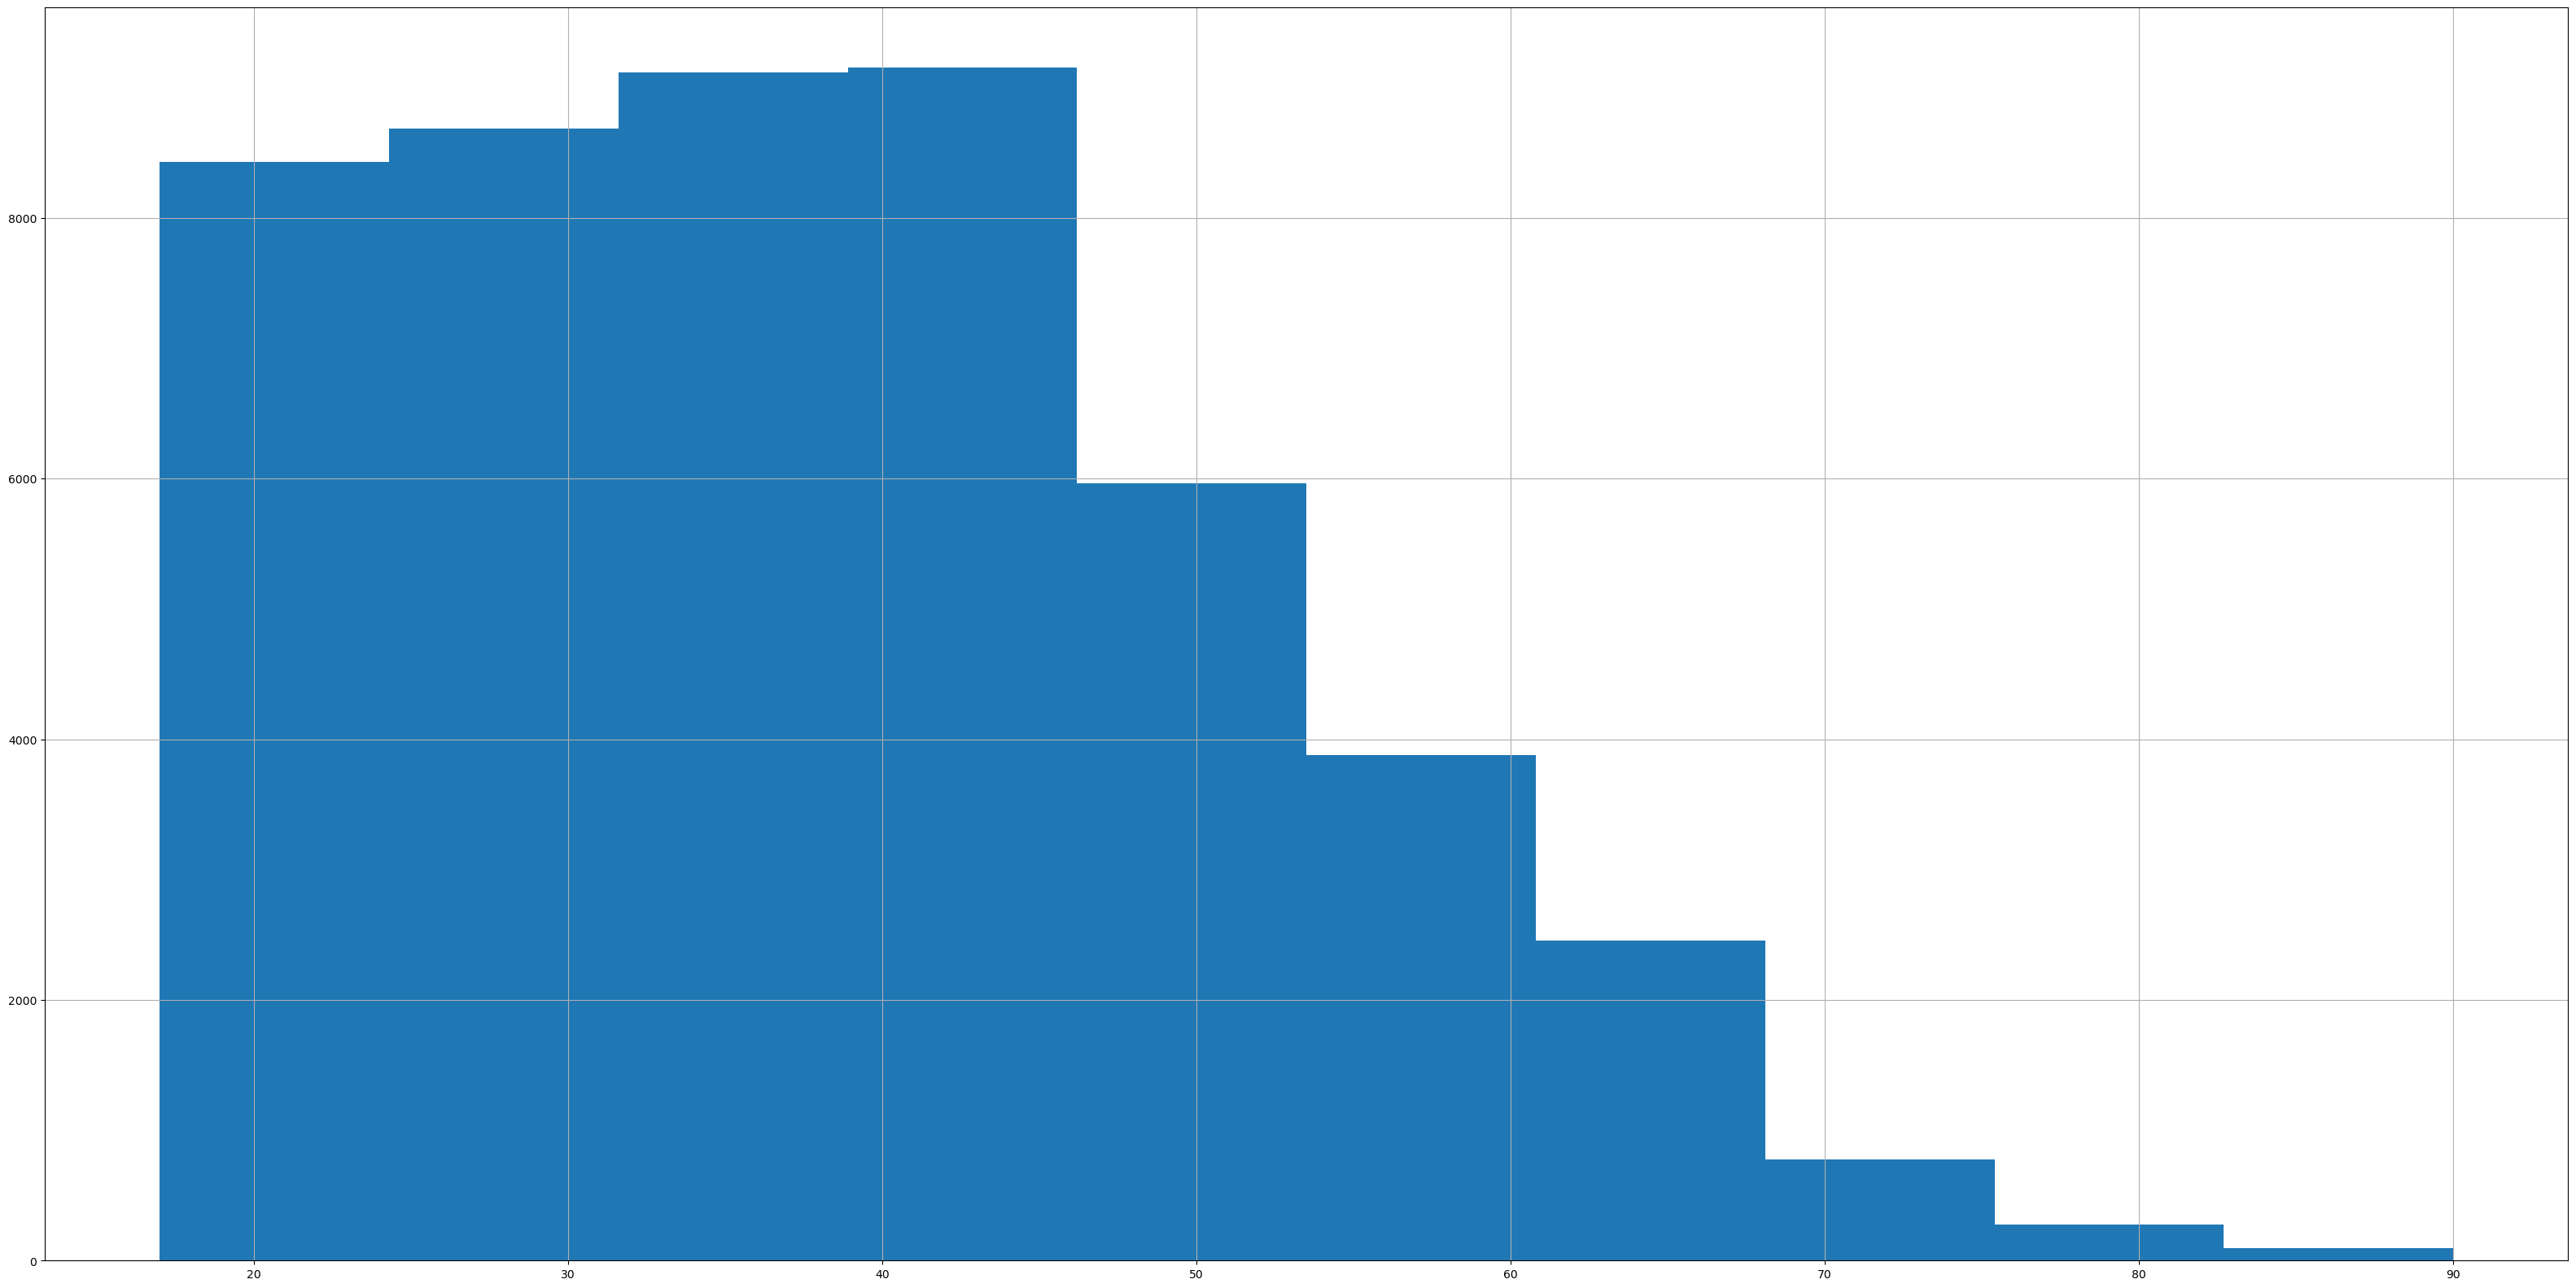

In [26]:
plt.figure(figsize=(40, 20))

income['age'].hist()


<Axes: >

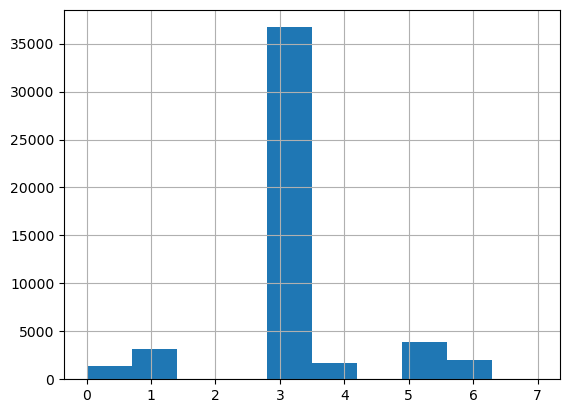

In [27]:
income['workclass'].hist()


<Axes: >

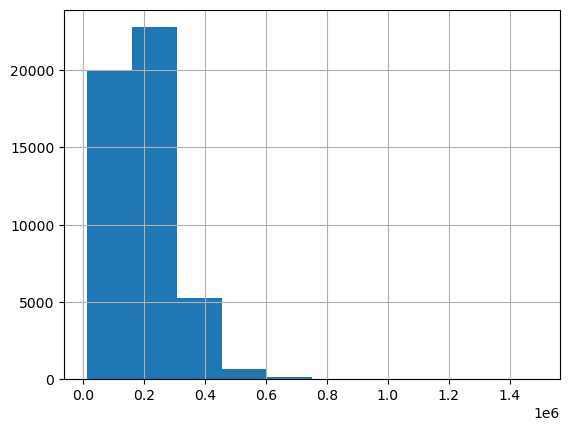

In [28]:
income['fnlwgt'].hist()


<Axes: >

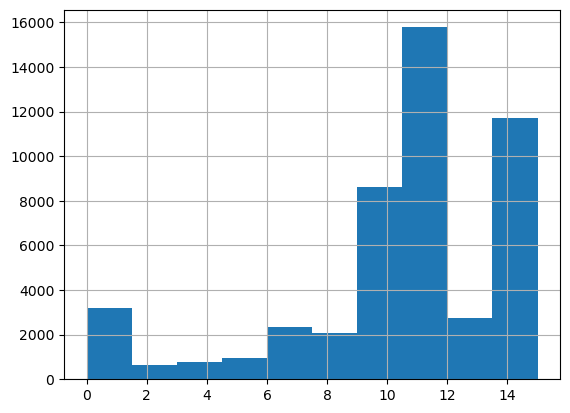

In [29]:
income['education'].hist()


<Axes: >

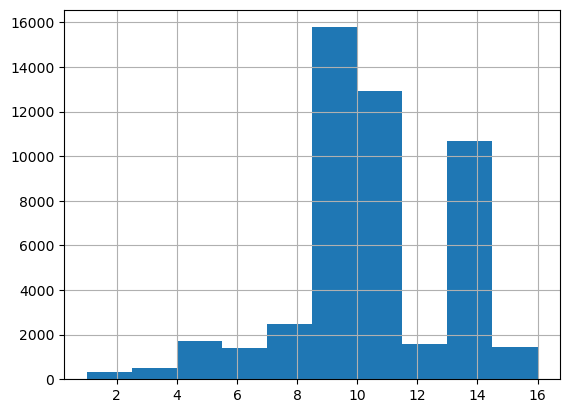

In [30]:
income['educational-num'].hist()


<Axes: >

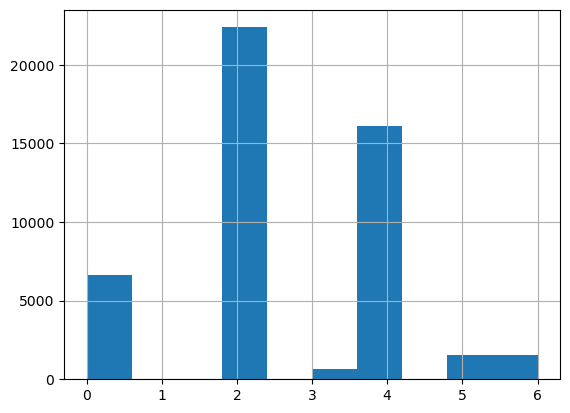

In [31]:
income['marital-status'].hist()



<Axes: >

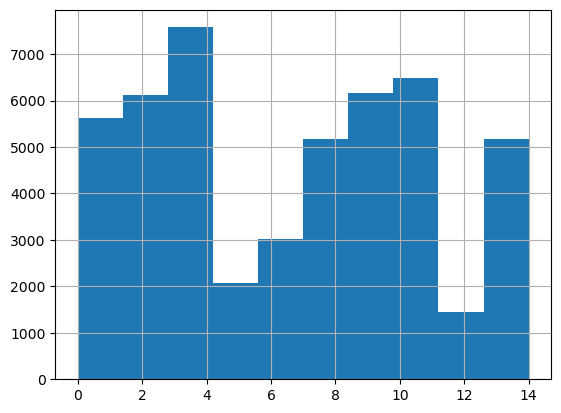

In [32]:
income['occupation'].hist()


<Axes: >

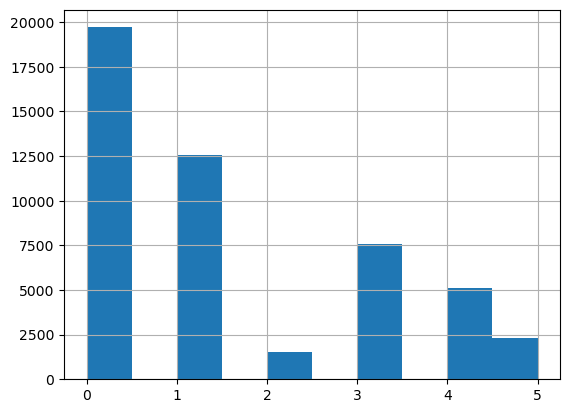

In [33]:
income['relationship'].hist()


<Axes: >

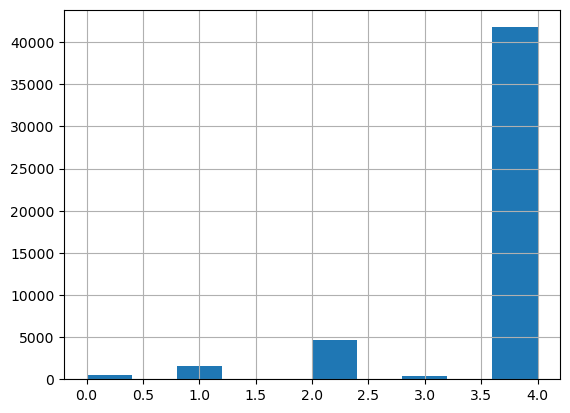

In [34]:
income['race'].hist()


<Axes: >

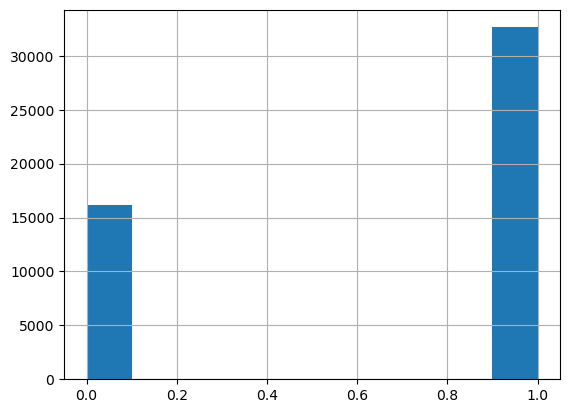

In [35]:
income['gender'].hist()


<Axes: >

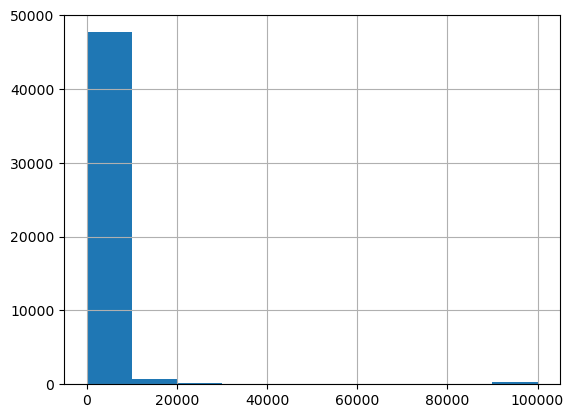

In [36]:
income['capital-gain'].hist()


<Axes: >

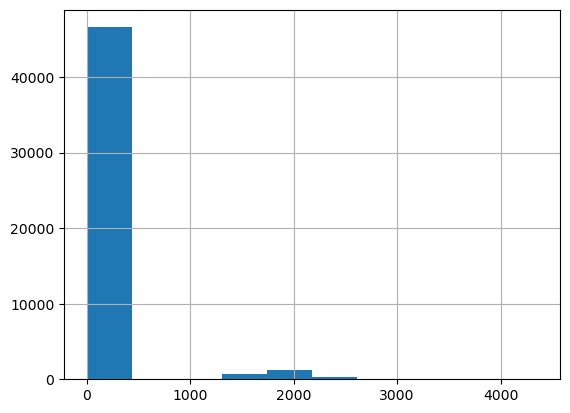

In [37]:
income['capital-loss'].hist()


<Axes: >

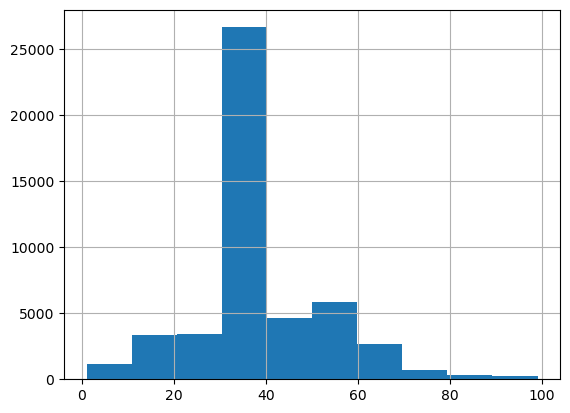

In [38]:
income['hours-per-week'].hist()


<Axes: >

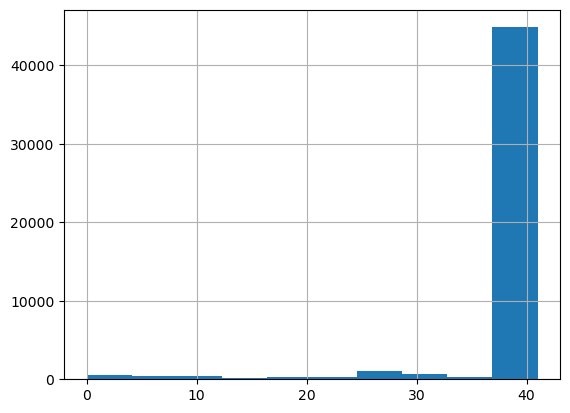

In [39]:
income['native-country'].hist()


<Axes: >

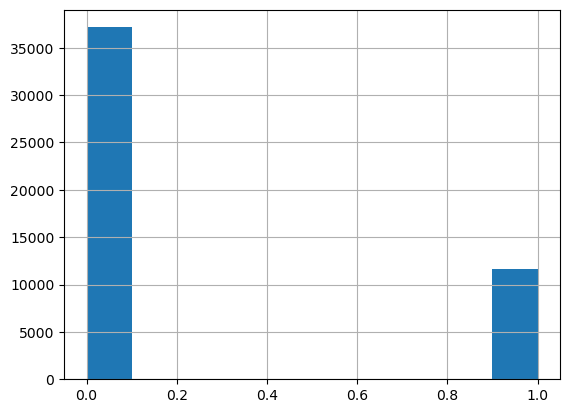

In [40]:
income['income'].hist()

In [41]:
#right away we can see most of the respondents are white male workers under the age of 50 who working around 40 hours a week in the US making less than 50k

<Figure size 4000x2000 with 0 Axes>

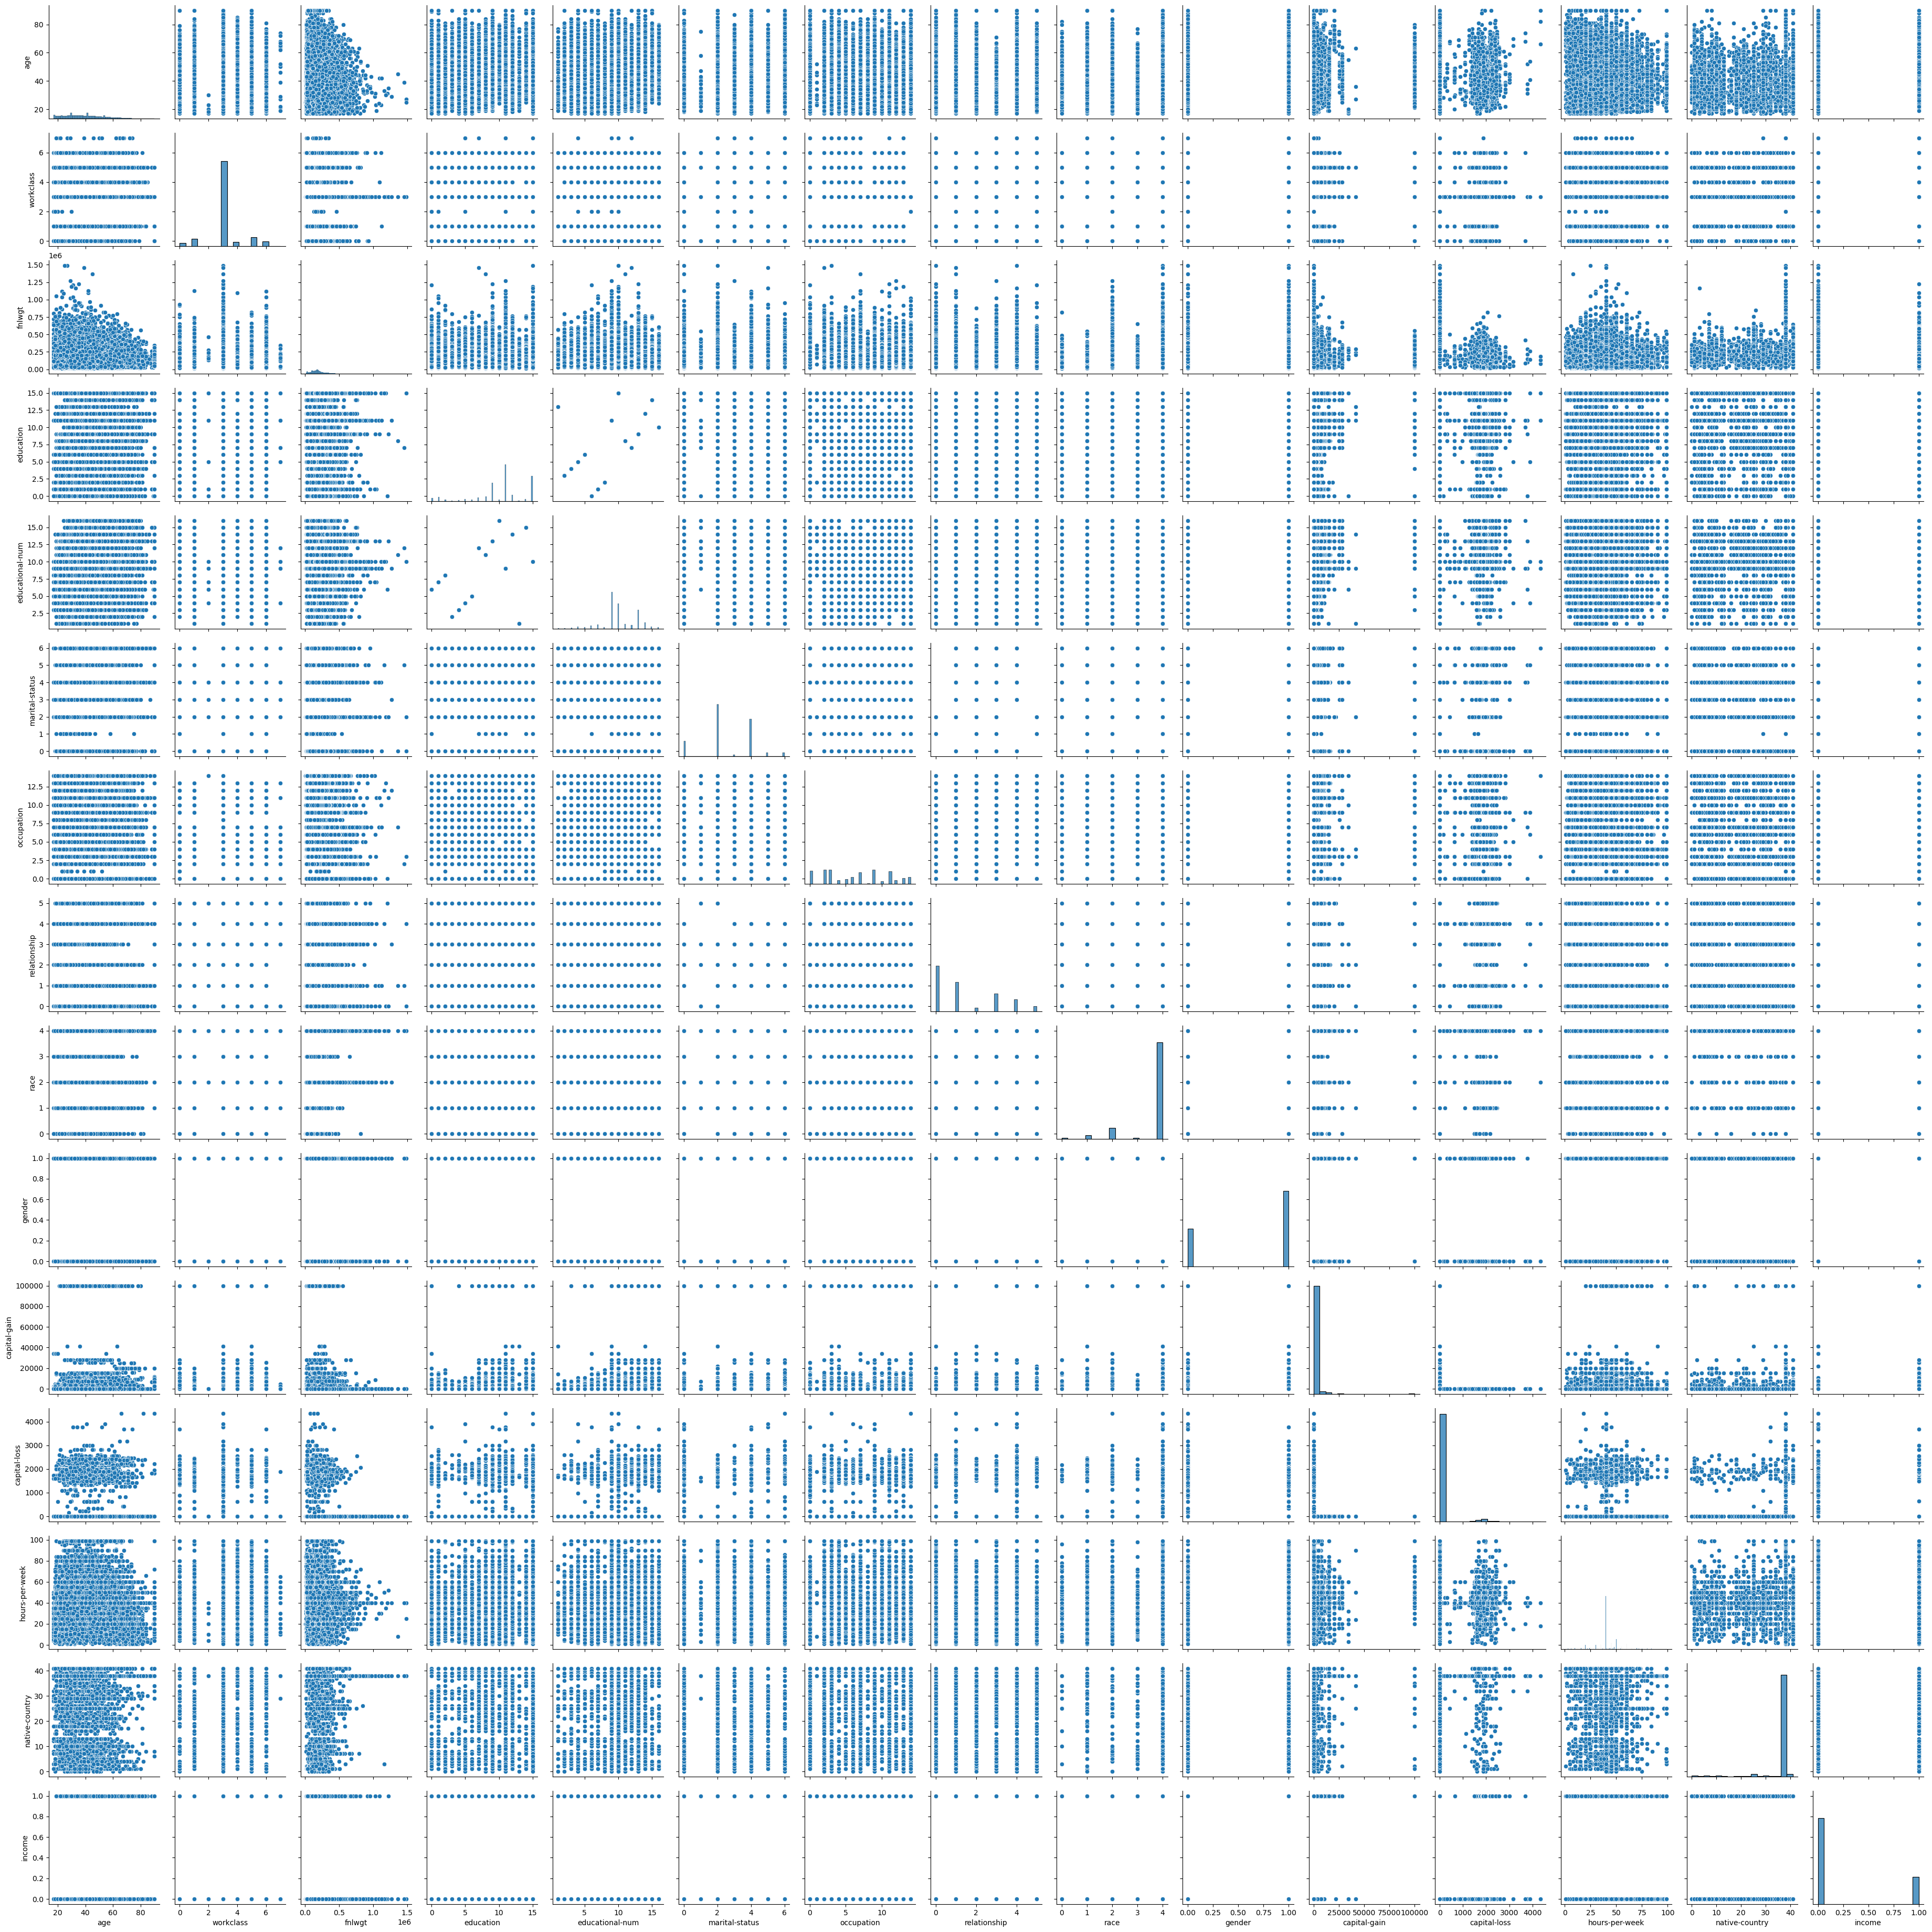

In [42]:
plt.figure(figsize=(40, 20))
sns.pairplot(income)

In [43]:
# will education level have a stronger rlationship to marital status

<Axes: >

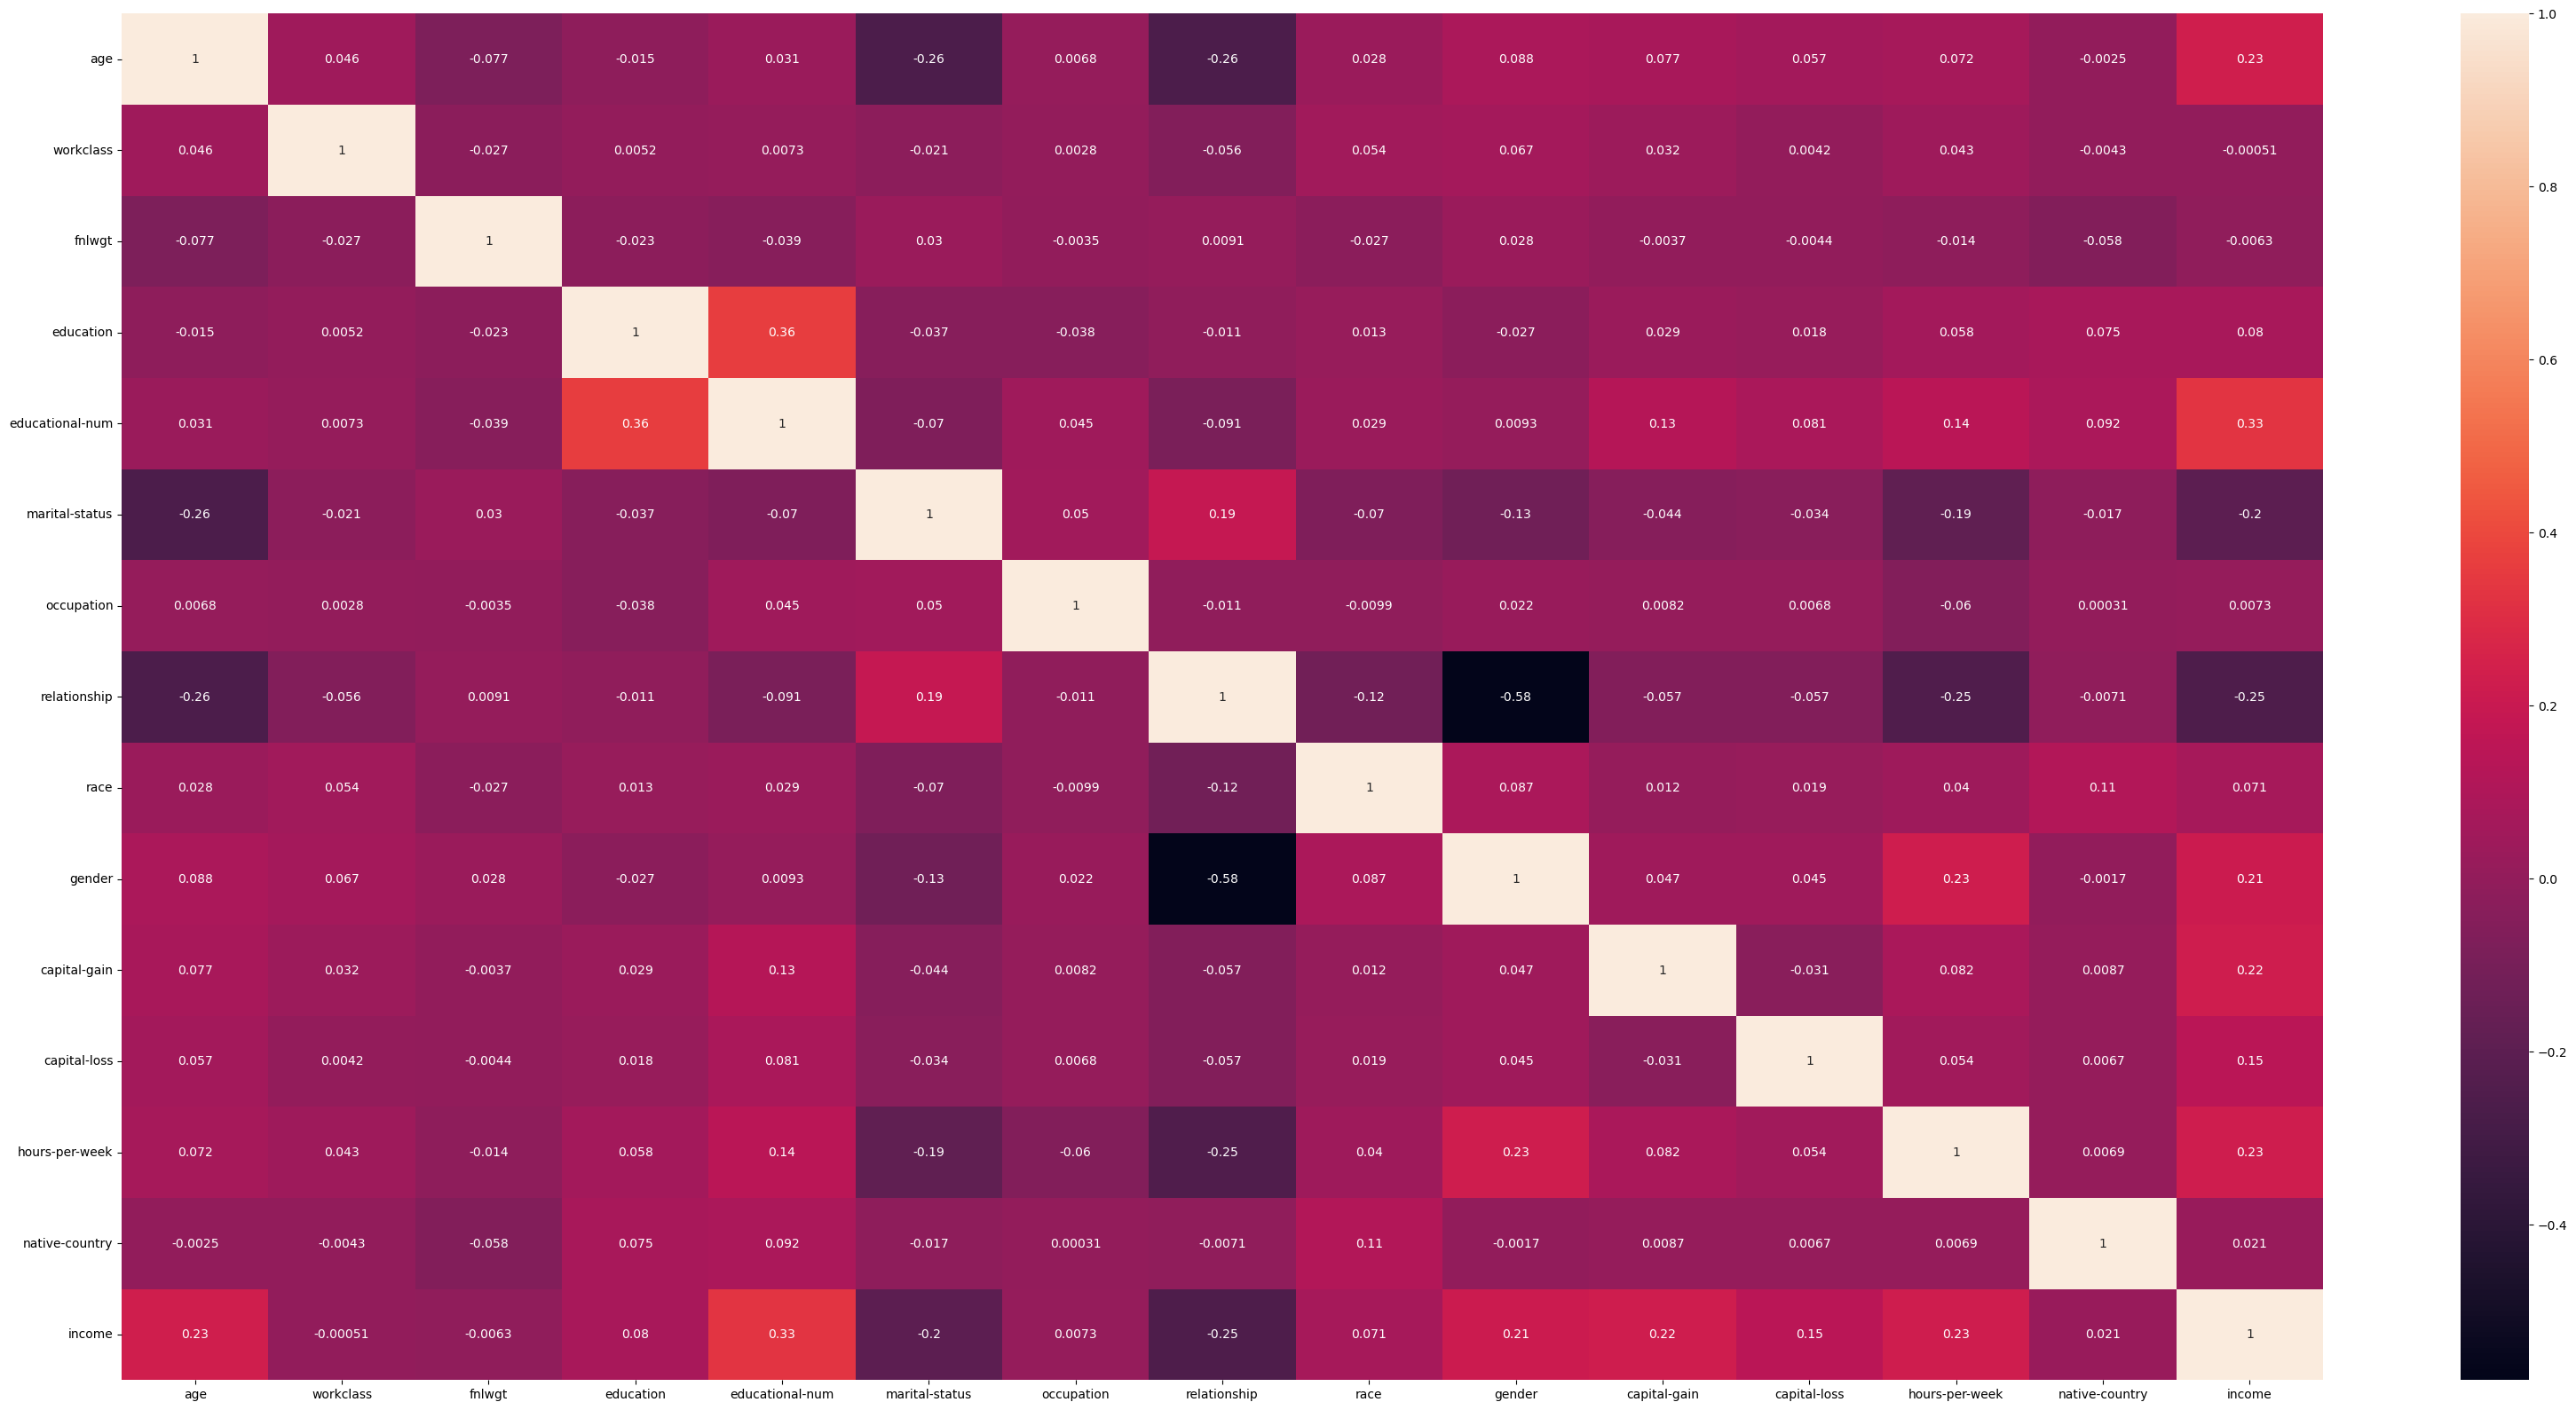

In [44]:
plt.figure(figsize=(40, 20))

sns.heatmap(data=income.corr(),annot=True)

In [45]:
# it seems like there may be a relationship between gender and relationship


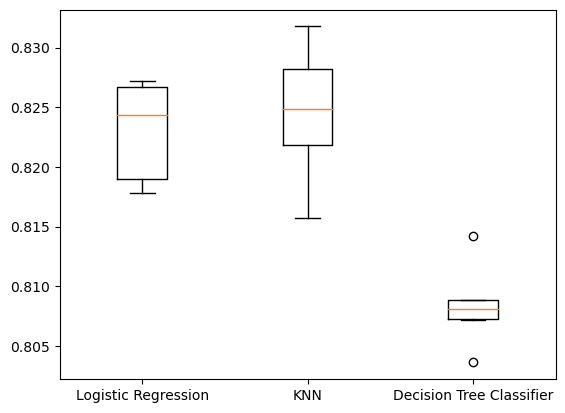

In [46]:
X = income.drop("income", axis =1).values
y = income["income"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
scaler= StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


models = {"Logistic Regression": LogisticRegression(), "KNN": KNeighborsClassifier(), "Decision Tree Classifier": DecisionTreeClassifier()}
results = []

# Loop through the models' values
for model in models.values():
  
  # Instantiate a KFold object
  kf = KFold(n_splits=6, random_state=12, shuffle=True)
  
  # Perform cross-validation
  cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)
  results.append(cv_results)
plt.boxplot(results, labels=models.keys())
plt.show()

In [47]:
#knn seems to give the most accurate predictions

In [48]:
for name, model in models.items():
	model.fit(X_train_scaled, y_train)
	test_score = model.score(X_test_scaled, y_test)
	print("{} Test Set Accuracy: {}".format(name, test_score))

Logistic Regression Test Set Accuracy: 0.8306445008598804
KNN Test Set Accuracy: 0.8331013021046597
Decision Tree Classifier Test Set Accuracy: 0.8157399066415527
